# Εργασία 2 - Δέντρα Απόφασης

**Όνομα: Kristi Cami AEM:167**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Φόρτωση των δεδομένων σε DataFrame και περιγραφή τους

**Φόρτωση δεδομένων**

In [ ]:
df = pd.read_csv('water_potability.csv')

**Προβολή των πρώτων γραμμών του DataFrame**

In [ ]:
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


**Περιγραφή των δεδομένων**

In [ ]:
print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


**Ιστογράμματα για κάθε χαρακτηριστικό**

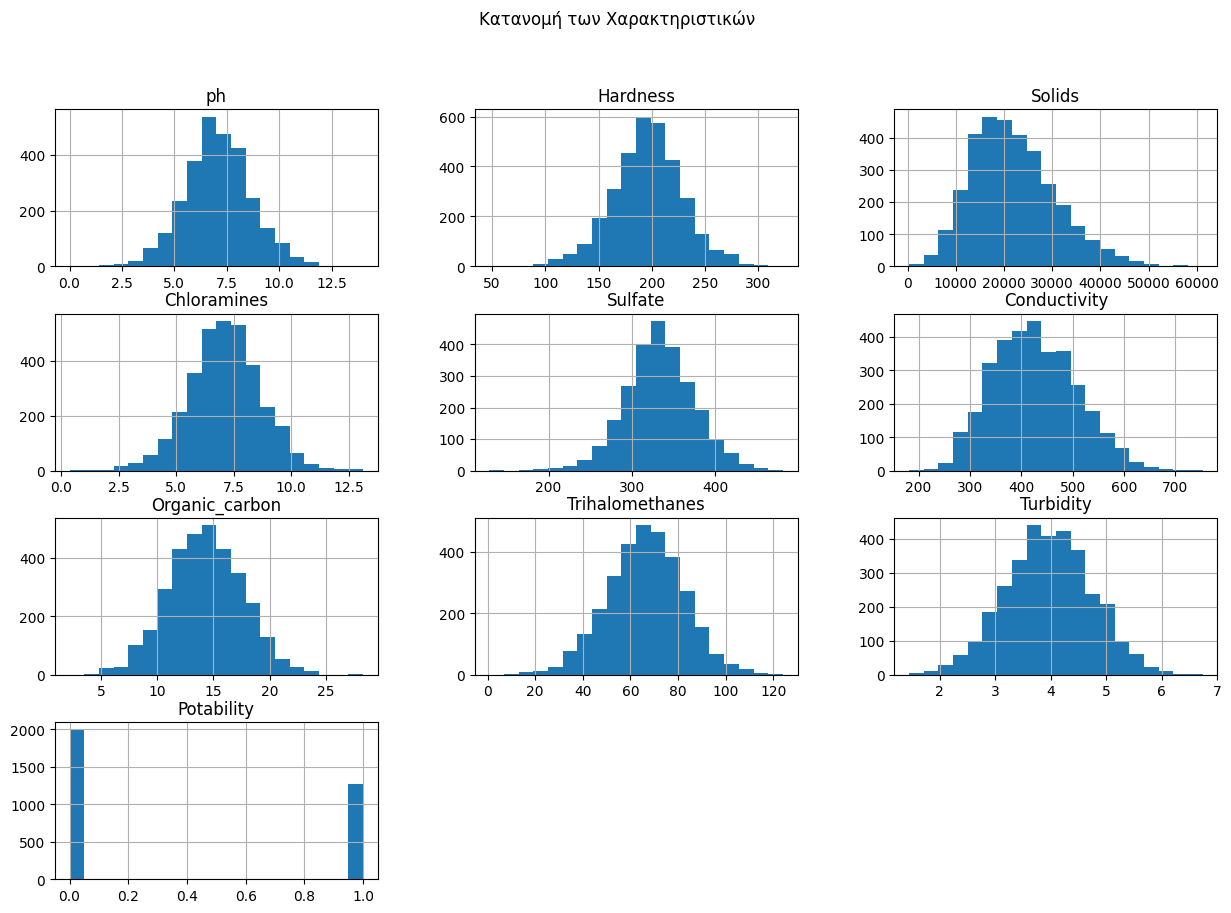

In [ ]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Κατανομή των Χαρακτηριστικών')
plt.show()

**Ραβδόγραμμα για την μεταβλητή Potability**

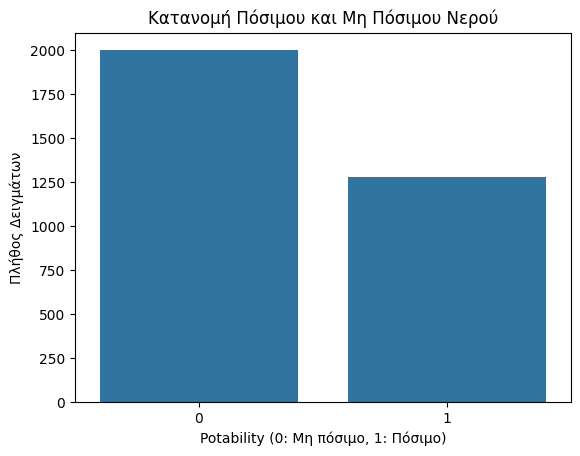

In [ ]:
sns.countplot(data=df, x='Potability')
plt.title('Κατανομή Πόσιμου και Μη Πόσιμου Νερού')
plt.xlabel('Potability (0: Μη πόσιμο, 1: Πόσιμο)')
plt.ylabel('Πλήθος Δειγμάτων')
plt.show()

**Υπολογισμός ελλιπών τιμών για κάθε χαρακτηριστικό**

In [ ]:
missing_values = df.isnull().sum()
print("Ελλιπείς τιμές ανά χαρακτηριστικό:\n", missing_values)

Ελλιπείς τιμές ανά χαρακτηριστικό:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Το γεγονός ότι λείπουν δεδομένα σε τρεις σημαντικές στήλες (ph, Sulfate, Trihalomethanes) μπορεί να επηρεάσει την ακρίβεια των μοντέλων μας, καθώς αυτές οι τιμές είναι κρίσιμες για την ανάλυση της ποιότητας του νερού.

**Ποσοστό πόσιμου και μη πόσιμου νερού**

In [ ]:
potability_counts = df['Potability'].value_counts(normalize=True) * 100
print("Ποσοστά πόσιμου και μη πόσιμου νερού:\n", potability_counts)

Ποσοστά πόσιμου και μη πόσιμου νερού:
 Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


Η ανισομερής κατανομή της κλάσης Potability μπορεί να οδηγήσει σε ένα μοντέλο που ευνοεί την πρόβλεψη της κυρίαρχης κλάσης (μη πόσιμο νερό).

Συμπερασματικά, η ποιότητα των δεδομένων δεν είναι άριστη, αλλά με κατάλληλη επεξεργασία (όπως η συμπλήρωση των ελλιπών τιμών με τεχνικές imputation και η χρήση μεθόδων για εξισορρόπηση των κλάσεων), το σύνολο δεδομένων μπορεί να υποστηρίξει τη δημιουργία ενός αξιόπιστου μοντέλου.

**Αντιμετώπιση ελλιπών τιμών**

In [ ]:
from sklearn.impute import SimpleImputer

Χρησιμοποιούμε SimpleImputer για τη συμπλήρωση των ελλιπών τιμών με τον μέσο όρο κάθε χαρακτηριστικού.

In [ ]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Σύγκριση των επιπέδων pH με βάση τα πρότυπα του ΠΟΥ

# Δείγματα με pH εντός των ορίων ΠΟΥ (6.5 - 8.5)

**Κατηγορία α. pH < 6.5**

In [ ]:
ph_below_6_5 = df[df['ph'] < 6.5]
potability_below_6_5 = ph_below_6_5['Potability'].value_counts(normalize=True) * 100
print("Ποσοστό πόσιμου και μη πόσιμου νερού για pH < 6.5:\n", potability_below_6_5)

Ποσοστό πόσιμου και μη πόσιμου νερού για pH < 6.5:
 Potability
0    63.22314
1    36.77686
Name: proportion, dtype: float64


Το μεγαλύτερο μέρος των δειγμάτων με pH < 6.5 είναι μη πόσιμο, κάτι που είναι αναμενόμενο καθώς τα χαμηλά επίπεδα pH μπορούν να κάνουν το νερό όξινο και ακατάλληλο για κατανάλωση.

**Κατηγορία β. 6.5 ≤ pH ≤ 8.5**

In [ ]:
ph_within_6_5_and_8_5 = df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5)]
potability_within_6_5_and_8_5 = ph_within_6_5_and_8_5['Potability'].value_counts(normalize=True) * 100
print("Ποσοστό πόσιμου και μη πόσιμου νερού για 6.5 ≤ pH ≤ 8.5:\n", potability_within_6_5_and_8_5)

Ποσοστό πόσιμου και μη πόσιμου νερού για 6.5 ≤ pH ≤ 8.5:
 Potability
0    56.099398
1    43.900602
Name: proportion, dtype: float64


Στην προτεινόμενη περιοχή του ΠΟΥ για pH, παρατηρούμε αυξημένο ποσοστό πόσιμου νερού, αν και το μη πόσιμο νερό εξακολουθεί να κυριαρχεί. Το γεγονός αυτό υποδεικνύει ότι το pH δεν είναι ο μοναδικός παράγοντας που καθορίζει την καταλληλότητα του νερού.

**Κατηγορία γ. pH > 8.5**

In [ ]:
ph_above_8_5 = df[df['ph'] > 8.5]
potability_above_8_5 = ph_above_8_5['Potability'].value_counts(normalize=True) * 100
print("Ποσοστό πόσιμου και μη πόσιμου νερού για pH > 8.5:\n", potability_above_8_5)

Ποσοστό πόσιμου και μη πόσιμου νερού για pH > 8.5:
 Potability
0    66.871166
1    33.128834
Name: proportion, dtype: float64


Τα δείγματα με pH πάνω από 8.5 είναι κατά κύριο λόγο μη πόσιμα. Το υψηλό pH μπορεί να υποδηλώνει αλκαλικό νερό, το οποίο μπορεί να είναι επίσης ακατάλληλο για κατανάλωση.

**Μέσος όρος και τυπική απόκλιση**

In [ ]:
potable_samples = df[df['Potability'] == 1]
mean_ph_potable = potable_samples['ph'].mean()
std_ph_potable = potable_samples['ph'].std()

print("Μέσος Όρος pH για πόσιμο νερό:", mean_ph_potable)
print("Τυπική Απόκλιση pH για πόσιμο νερό:", std_ph_potable)

Μέσος Όρος pH για πόσιμο νερό: 7.0737832953812
Τυπική Απόκλιση pH για πόσιμο νερό: 1.4480481486738812


Ο μέσος όρος του pH για τα πόσιμα δείγματα βρίσκεται εντός του εύρους 6.5 - 8.5, κάτι που συμφωνεί με το πρότυπο του ΠΟΥ. Η τυπική απόκλιση δείχνει ότι η διακύμανση του pH στα πόσιμα δείγματα είναι σχετικά μικρή, γεγονός που ενισχύει τον ισχυρισμό ότι το εύρος αυτό είναι ενδεικτικό της καταλληλότητας του νερού για κατανάλωση.

# Διάγραμμα διασποράς μεταξύ pH και Χλωραμίνης

**Διάγραμμα διασποράς μεταξύ pH και Chloramine**

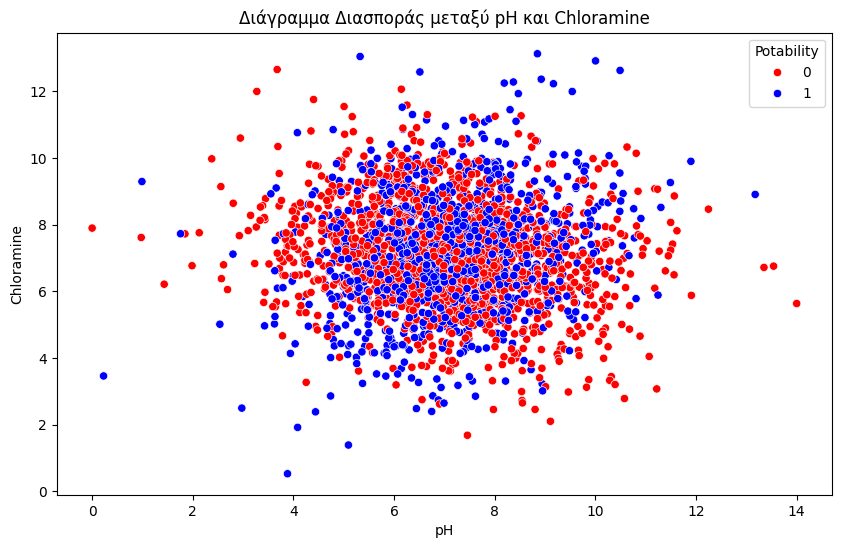

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ph', y='Chloramines', hue='Potability', palette={0: 'red', 1: 'blue'})
plt.title('Διάγραμμα Διασποράς μεταξύ pH και Chloramine')
plt.xlabel('pH')
plt.ylabel('Chloramine')
plt.show()



1.   Τα πόσιμα δείγματα (μπλε) και τα μη πόσιμα δείγματα (κόκκινο) φαίνεται να βρίσκονται σχεδόν σε κάθε περιοχή του διαγράμματος, χωρίς σαφή διαχωρισμό.

2.   Τα σημεία αλληλοκαλύπτονται έντονα, κάτι που υποδηλώνει ότι δεν υπάρχει ξεκάθαρος διαχωρισμός των δειγμάτων μόνο με βάση τα επίπεδα pH και Chloramine.
3. Αν και τα προτεινόμενα επίπεδα χλωραμίνης από τον ΠΟΥ είναι έως 4 ppm, παρατηρούμε ότι πολλά δείγματα (και πόσιμα και μη πόσιμα) έχουν τιμές χλωραμίνης πολύ υψηλότερες από αυτή την τιμή. Αυτό σημαίνει ότι το χαρακτηριστικό Chloramine από μόνο του δεν μπορεί να διαχωρίσει τα δείγματα σε πόσιμα και μη πόσιμα σύμφωνα με το όριο του ΠΟΥ.

# Δημιουργία numpy arrays και διαχωρισμός των δεδομένων

In [ ]:
from sklearn.model_selection import train_test_split

**Ορισμός Χ και y**

In [ ]:
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

**Διάσπαση σε train και test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Εκπαίδευση Decision Tree και μέτρηση ακρίβειας

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Εκπαίδευση Decision Tree**

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

**Ακρίβεια στα train και test set**

In [ ]:
train_acc = accuracy_score(y_train, tree_clf.predict(X_train))
test_acc = accuracy_score(y_test, tree_clf.predict(X_test))

print("Ακρίβεια στο train set:", train_acc)
print("Ακρίβεια στο test set:", test_acc)

Ακρίβεια στο train set: 0.9986916703009159
Ακρίβεια στο test set: 0.5676500508646999


# Υπερπαραμετροποίηση του δέντρου απόφασης

**Λίστα για να αποθηκεύσουμε τα αποτελέσματα**

In [ ]:
results = []

**Συνδυασμοί παραμέτρων**

In [ ]:
criterions = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2]
max_features_options = [None, 'sqrt']
ccp_alphas = [0, 0.01]

**Βρόγχος για κάθε συνδυασμό**

In [ ]:
for criterion in criterions:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            for min_samples_leaf in min_samples_leafs:
                for max_features in max_features_options:
                    for ccp_alpha in ccp_alphas:
                        # Ορισμός και εκπαίδευση του δέντρου
                        tree_clf = DecisionTreeClassifier(
                            criterion=criterion,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features,
                            ccp_alpha=ccp_alpha,
                            random_state=0
                        )
                        tree_clf.fit(X_train, y_train)

                        # Υπολογισμός της ακρίβειας
                        train_acc = accuracy_score(y_train, tree_clf.predict(X_train))
                        test_acc = accuracy_score(y_test, tree_clf.predict(X_test))

                        # Αποθήκευση αποτελεσμάτων
                        results.append({
                            'criterion': criterion,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_features': max_features,
                            'ccp_alpha': ccp_alpha,
                            'train_acc': train_acc,
                            'test_acc': test_acc
                        })


**Μετατροπή των αποτελεσμάτων σε DataFrame για εύκολη προβολή**

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

    criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0        gini        NaN                  2                 1         None   
1        gini        NaN                  2                 1         None   
2        gini        NaN                  2                 1         sqrt   
3        gini        NaN                  2                 1         sqrt   
4        gini        NaN                  2                 2         None   
..        ...        ...                ...               ...          ...   
139   entropy        5.0                 10                 1         sqrt   
140   entropy        5.0                 10                 2         None   
141   entropy        5.0                 10                 2         None   
142   entropy        5.0                 10                 2         sqrt   
143   entropy        5.0                 10                 2         sqrt   

     ccp_alpha  train_acc  test_acc  
0         0.00   0.998692

# Επιλογή Καλύτερου συνδυασμού και οπτικοποίηση δέντρου



**Επιλογή του καλύτερου συνδυασμού παραμέτρων με max_depth=3**

In [ ]:
best_params = results_df[results_df['max_depth'] == 3].sort_values(by='test_acc', ascending=False).iloc[0]

**Εκπαίδευση του βέλτιστου δέντρου**

In [ ]:
best_tree_clf = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    ccp_alpha=float(best_params['ccp_alpha']),
    random_state=0
)
best_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

**Οπτικοποίηση του δέντρου**

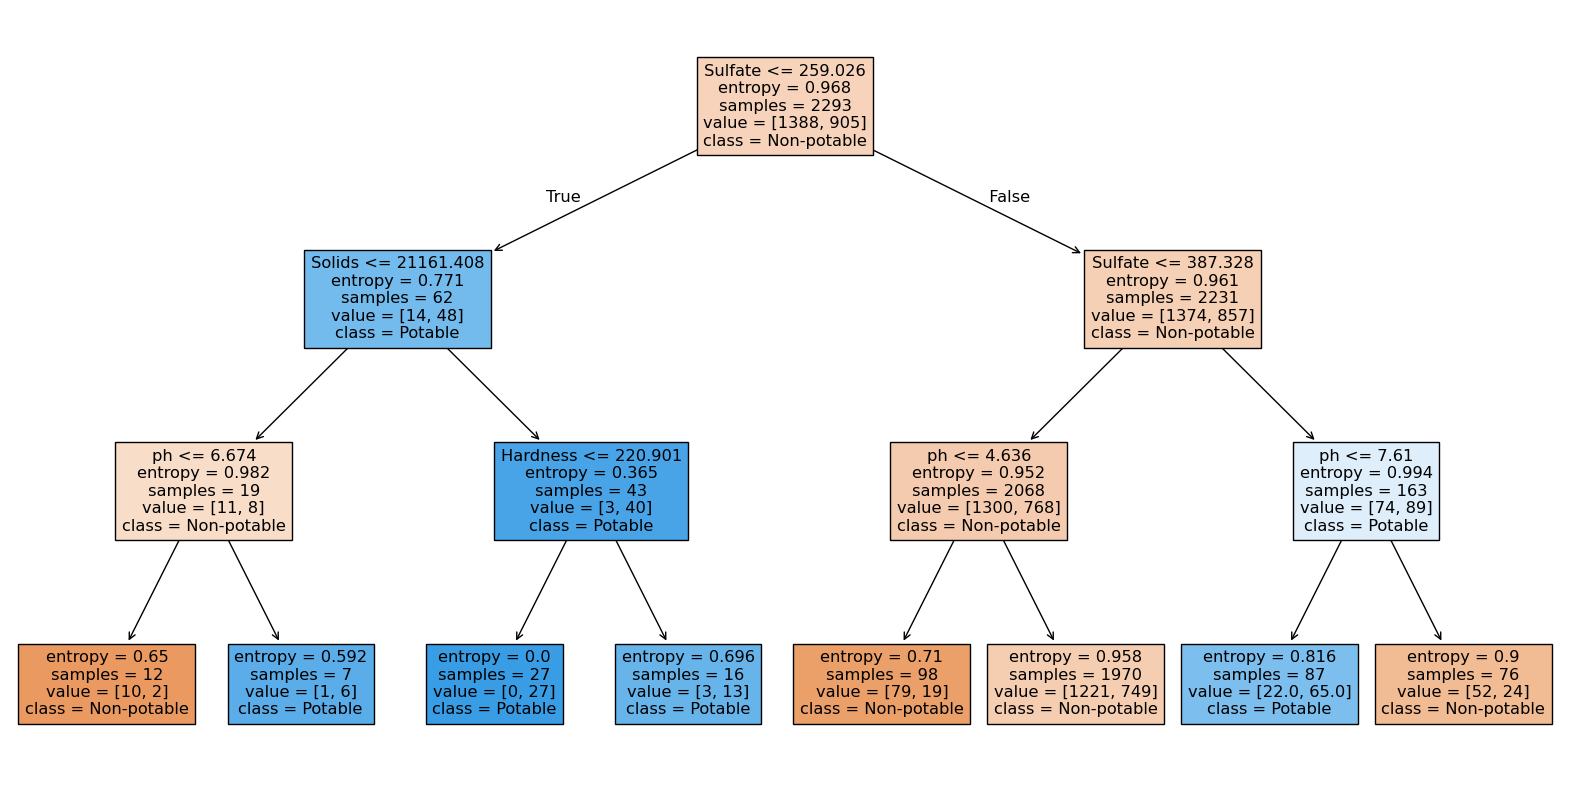

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_tree_clf, filled=True, feature_names=df.columns[:-1], class_names=['Non-potable', 'Potable'])
plt.show()

Το δέντρο χρησιμοποιεί πολλαπλά χαρακτηριστικά (όπως Sulfate, Solids, Hardness και pH) για να καταλήξει σε μια ταξινόμηση. Αυτό σημαίνει ότι η καταλληλότητα του νερού εξαρτάται από έναν συνδυασμό χημικών χαρακτηριστικών και όχι από ένα μόνο χαρακτηριστικό, κάτι που ενισχύει την αξιοπιστία του μοντέλου.



# Σημαντικότητα χαρακτηριστικών στο βέλτιστο δέντρο Απόφασης

**Σημαντικότητα χαρακτηριστικών**

In [ ]:
feature_importances = best_tree_clf.feature_importances_

**Δημιουργία ραβδογράμματος**

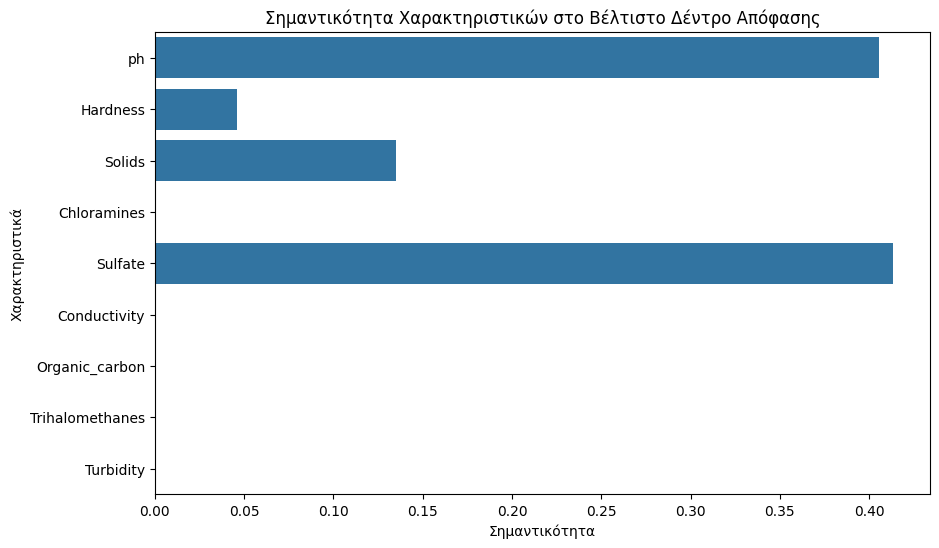

In [ ]:
features = df.columns[:-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Σημαντικότητα Χαρακτηριστικών στο Βέλτιστο Δέντρο Απόφασης')
plt.xlabel('Σημαντικότητα')
plt.ylabel('Χαρακτηριστικά')
plt.show()

**DataFrame για αναλυτική προβολή**

In [ ]:
feature_importances = best_tree_clf.feature_importances_
features = df.columns[:-1]

feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

           Feature  Importance
4          Sulfate    0.413391
0               ph    0.405813
2           Solids    0.134971
1         Hardness    0.045825
3      Chloramines    0.000000
5     Conductivity    0.000000
6   Organic_carbon    0.000000
7  Trihalomethanes    0.000000
8        Turbidity    0.000000


Με βάση τις τιμές σημαντικότητας που εξάγονται από το βέλτιστο δέντρο απόφασης, το χαρακτηριστικό Sulfate αναδεικνύεται ως το πιο σημαντικό, με επίδραση 0.413, ακολουθούμενο από το pH με επίδραση 0.406. Αυτά τα δύο χαρακτηριστικά φαίνεται να έχουν τη μεγαλύτερη συμβολή στη διάκριση του νερού σε πόσιμο και μη πόσιμο, κάτι που υποδεικνύει τη σημαντική τους σχέση με την ποιότητα του νερού. Το Solids και το Hardness συνεισφέρουν λιγότερο, με σημαντικότητες 0.135 και 0.046 αντίστοιχα, αλλά παραμένουν σημαντικά για την αξιολόγηση της ποιότητας. Τα υπόλοιπα χαρακτηριστικά, όπως το Chloramines, δεν χρησιμοποιήθηκαν από το δέντρο, καθώς είχαν μηδενική σημαντικότητα, υποδεικνύοντας ότι δεν συνέβαλαν στη λήψη αποφάσεων για την καταλληλότητα του νερού.

# Εξήγηση για την απόδοση ενός τυχαίου δάσους σε σχέση με το δέντρο απόφασης

Το Τυχαίο Δάσος (Random Forest) είναι πιο ανθεκτικό στα δεδομένα και έχει καλύτερη απόδοση σε πολλές περιπτώσεις επειδή:

1.   Ελαχιστοποιεί την υπερπροσαρμογή (overfitting) που μπορεί να παρουσιάζει ένα μόνο δέντρο.
2.   Αυξάνει τη γενικευτική ικανότητα του μοντέλου συνδυάζοντας πολλές προβλέψεις.
3.  Χρησιμοποιεί διαφορετικά υποσύνολα χαρακτηριστικών σε κάθε δέντρο, προσφέροντας σταθερότητα σε σχέση με το θόρυβο στα δεδομένα.



# Εκπαίδευση τυχαίου δάσους και βελτιστοποίηση παραμέτρων

In [ ]:
from sklearn.ensemble import RandomForestClassifier


**Αρχικοποίηση αποτελεσμάτων**

In [ ]:
rf_results = []

**Συνδυασμοί των παραμέτρων όπως στο Ερώτημα 6, με προσθήκη n_estimators**

In [ ]:
for n_estimators in [50, 100, 200]:  # Αριθμός δέντρων στο Random Forest
    for criterion in ['gini', 'entropy']:
        for max_depth in [None, 3, 5]:
            for min_samples_split in [2, 5, 10]:
                for min_samples_leaf in [1, 2]:
                    for max_features in [None, 'sqrt']:
                        for ccp_alpha in [0, 0.01]:
                            # Ορισμός του Random Forest με τον τρέχοντα συνδυασμό παραμέτρων
                            rf_clf = RandomForestClassifier(
                                n_estimators=n_estimators,
                                criterion=criterion,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                ccp_alpha=ccp_alpha,
                                random_state=0
                            )
                            # Εκπαίδευση του μοντέλου
                            rf_clf.fit(X_train, y_train)

                            # Υπολογισμός ακρίβειας στο train και test set
                            train_acc = accuracy_score(y_train, rf_clf.predict(X_train))
                            test_acc = accuracy_score(y_test, rf_clf.predict(X_test))

                            # Προσθήκη των αποτελεσμάτων στη λίστα
                            rf_results.append({
                                'n_estimators': n_estimators,
                                'criterion': criterion,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'max_features': max_features,
                                'ccp_alpha': ccp_alpha,
                                'train_acc': train_acc,
                                'test_acc': test_acc
                            })


**Μετατροπή σε DataFrame**

In [ ]:
rf_results_df = pd.DataFrame(rf_results)
print(rf_results_df)

     n_estimators criterion  max_depth  min_samples_split  min_samples_leaf  \
0              50      gini        NaN                  2                 1   
1              50      gini        NaN                  2                 1   
2              50      gini        NaN                  2                 1   
3              50      gini        NaN                  2                 1   
4              50      gini        NaN                  2                 2   
..            ...       ...        ...                ...               ...   
427           200   entropy        5.0                 10                 1   
428           200   entropy        5.0                 10                 2   
429           200   entropy        5.0                 10                 2   
430           200   entropy        5.0                 10                 2   
431           200   entropy        5.0                 10                 2   

    max_features  ccp_alpha  train_acc  test_acc  


# Σύγκριση μεταξύ False Positive και False Negative

False Positive (FP): Η συσκευή αποφασίζει ότι το μη πόσιμο νερό είναι πόσιμο. Αυτό είναι νομικά επικίνδυνο καθώς μπορεί να προκαλέσει προβλήματα υγείας.

False Negative (FN): Η συσκευή αποφασίζει ότι το πόσιμο νερό δεν είναι πόσιμο, προκαλώντας σπατάλη πόρων αλλά όχι άμεσο κίνδυνο.

Συμπερασματικά, είναι πιο σημαντικό να ελαχιστοποιηθούν τα false positives για λόγους ασφαλείας και νομικής ευθύνης.

# Ανάλυση σημαντικότητας στο καλύτερο τυχαίο Δάσος

**Επιλογή του καλύτερου συνδυασμού**

In [ ]:
best_rf_params = rf_results_df.sort_values(by='test_acc', ascending=False).iloc[0]

**Επανεκπαίδευση του Random Forest με τις καλύτερες παραμέτρους**

In [ ]:
best_rf_clf = RandomForestClassifier(
    n_estimators=int(best_rf_params['n_estimators']),
    criterion=best_rf_params['criterion'],
    max_depth=3,
    random_state=0
)
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200,
                       random_state=0)

**Σημαντικότητα χαρακτηριστικών**

In [ ]:
feature_importances_rf = best_rf_clf.feature_importances_

**Ραβδόγραμμα για τη σημαντικότητα χαρακτηριστικών**

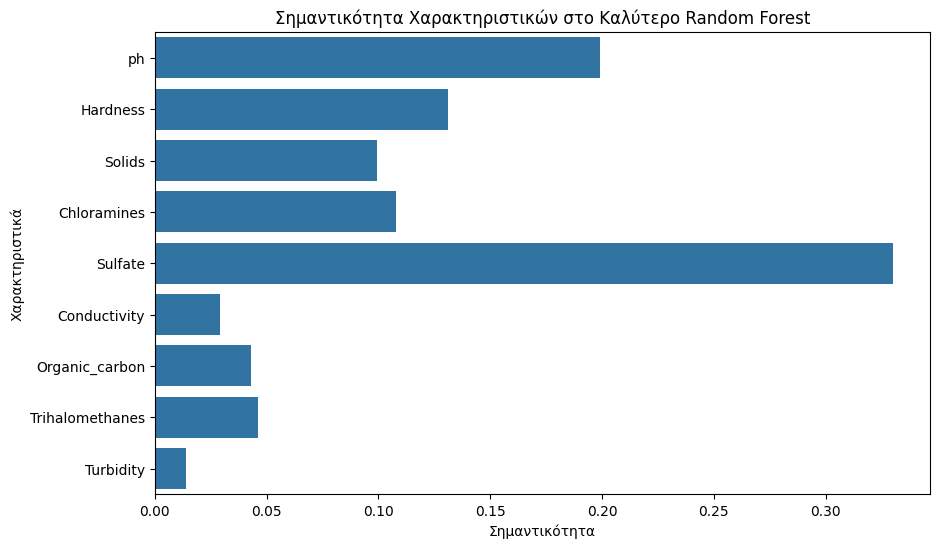

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf, y=features)
plt.title('Σημαντικότητα Χαρακτηριστικών στο Καλύτερο Random Forest')
plt.xlabel('Σημαντικότητα')
plt.ylabel('Χαρακτηριστικά')
plt.show()

**Δημιουργία DataFrame για εμφάνιση των χαρακτηριστικών**

In [ ]:
feature_importances_rf = best_rf_clf.feature_importances_
features = df.columns[:-1]

feature_importances_rf_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print(feature_importances_rf_df)

           Feature  Importance
4          Sulfate    0.330125
0               ph    0.199194
1         Hardness    0.131192
3      Chloramines    0.108028
2           Solids    0.099367
7  Trihalomethanes    0.045997
6   Organic_carbon    0.043061
5     Conductivity    0.029192
8        Turbidity    0.013844


Σύμφωνα με το Random Forest, τα πέντε πιο σημαντικά χαρακτηριστικά για τη συσκευή είναι: Sulfate, pH, Hardness, Chloramines, και Solids. Αυτά τα χαρακτηριστικά συμβάλλουν σημαντικά στην απόφαση για την καταλληλότητα του νερού.

Η διαφορά στη σημαντικότητα των χαρακτηριστικών μεταξύ του Random Forest και του Δέντρου Απόφασης οφείλεται στη διαφορετική προσέγγιση των δύο μοντέλων. Το Random Forest συνδυάζει πληροφορίες από πολλά δέντρα και λαμβάνει υπόψη τη συνολική συνεισφορά περισσότερων χαρακτηριστικών, ενώ το Δέντρο Απόφασης βασίζεται σε επιμέρους διαχωρισμούς που περιορίζουν τα χαρακτηριστικά που χρησιμοποιούνται. Έτσι, το Random Forest μπορεί να παρέχει μια πιο ισορροπημένη και σταθερή αξιολόγηση της σημαντικότητας των χαρακτηριστικών.

# Νομική Ασφάλεια για την Εταιρεία - Decision Tree ή Random Forest;

Decision Tree: Το Decision Tree είναι εύκολα κατανοητό, καθώς βασίζεται σε σαφείς κανόνες if-then, επιτρέποντας την άμεση ανάλυση της διαδικασίας λήψης αποφάσεων. Αυτή η διαφάνεια μπορεί να είναι χρήσιμη σε νομικά πλαίσια. Ωστόσο, τα δέντρα απόφασης είναι πιο επιρρεπή σε υπερπροσαρμογή (overfitting) και ίσως να μην προσφέρουν την ίδια ακρίβεια με πιο σύνθετα μοντέλα.

Random Forest: Το Random Forest χρησιμοποιεί συνδυασμούς πολλών δέντρων για να ενισχύσει την ακρίβεια και τη σταθερότητα του μοντέλου, μειώνοντας τον κίνδυνο λανθασμένων προβλέψεων. Ωστόσο, λόγω της πολυπλοκότητας του, μπορεί να είναι πιο δύσκολο να ερμηνευτεί. Η αυξημένη ακρίβεια και ανθεκτικότητα στις διακυμάνσεις των δεδομένων το καθιστούν πιο αξιόπιστο για εφαρμογές όπου η ακρίβεια είναι κρίσιμη.

Από νομική άποψη, το Random Forest προσφέρει μεγαλύτερη ασφάλεια για την εταιρεία χάρη στη σταθερότητα και την ακρίβειά του, παρά τη μειωμένη ερμηνευσιμότητα του σε σχέση με το Decision Tree. Αυτά τα πλεονεκτήματα μπορούν να περιορίσουν τους κινδύνους λανθασμένων αποφάσεων και να υποστηρίξουν την ασφάλεια των τελικών χρηστών της συσκευής.








# Εργασία 3 - Συνδυασμός Μοντέλων

In [ ]:
import yfinance as yf

**Ορισμός του ticker**

In [ ]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)

**Αφαίρεση των στηλών Volume, Dividends, Stock Splits**

In [ ]:
df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df.head()

,Date,Open,High,Low,Close
0,2019-11-04 00:00:00-05:00,97.220001,97.580002,97.169998,97.510002
1,2019-11-05 00:00:00-05:00,97.550003,98.010002,97.470001,97.980003
2,2019-11-06 00:00:00-05:00,97.940002,97.980003,97.779999,97.949997
3,2019-11-07 00:00:00-05:00,97.949997,98.230003,97.820000,98.139999
4,2019-11-08 00:00:00-05:00,98.139999,98.400002,98.099998,98.349998


**Οπτικοποίηση δεδομένων με Plotly**

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='Low'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close'))

fig.update_layout(title="USD Price Over Time", xaxis_title="Date", yaxis_title="Price", height=600)
fig.show()

# Ανάλυση στατικότητας της χρονοσειράς

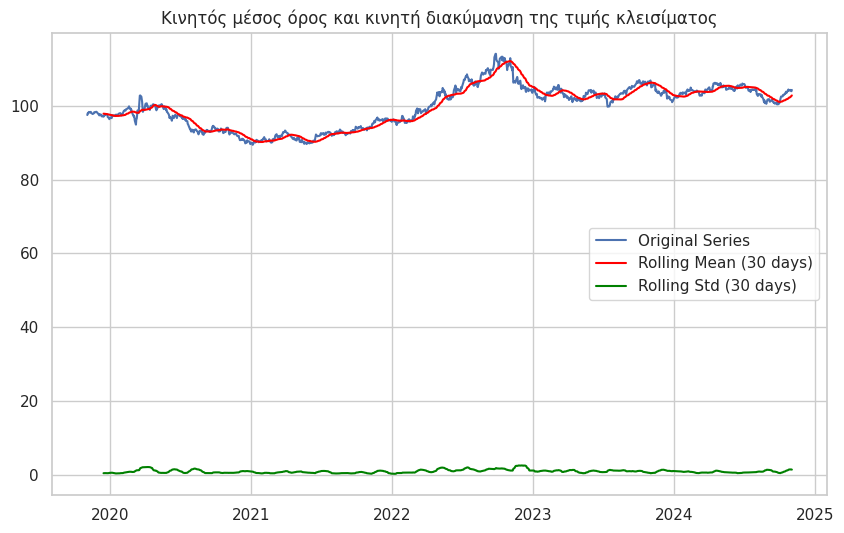

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Υπολογισμός κινητού μέσου όρου και κινητής διακύμανσης
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

# Γραφική απεικόνιση
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Original Series')
plt.plot(df['Date'], rolling_mean, color='red', label='Rolling Mean (30 days)')
plt.plot(df['Date'], rolling_std, color='green', label='Rolling Std (30 days)')
plt.legend()
plt.title('Κινητός μέσος όρος και κινητή διακύμανση της τιμής κλεισίματος')
plt.show()

Για να χαρακτηριστεί μία χρονοσειρά ως στατική, θα έπρεπε οι στατιστικές της ιδιότητες, όπως ο μέσος όρος και η διακύμανση, να παραμένουν σταθερές στο χρόνο.

Από το διάγραμμα παρατηρούμε όμως ότι ο κινητός μέσος όρος και η κινητή διακύμανση παρουσιάζουν σημαντικές διακυμάνσεις με την πάροδο του χρόνου. Ο κινητός μέσος όρος δεν παραμένει σταθερός, αλλάζει ανάλογα με τις τάσεις που επικρατούν στην αγορά. Παράλληλα, η κινητή διακύμανση εμφανίζει διακυμάνσεις, κάτι που υποδηλώνει ότι η μεταβλητότητα στη χρονοσειρά δεν είναι σταθερή

Η παρατήρηση αυτή δείχνει ότι η χρονοσειρά δεν είναι στατική, αφού τόσο ο μέσος όρος όσο και η διακύμανση αλλάζουν με την πάροδο του χρόνου.

# Τάση του δολαρίου τον Οκτώβριο του 2024

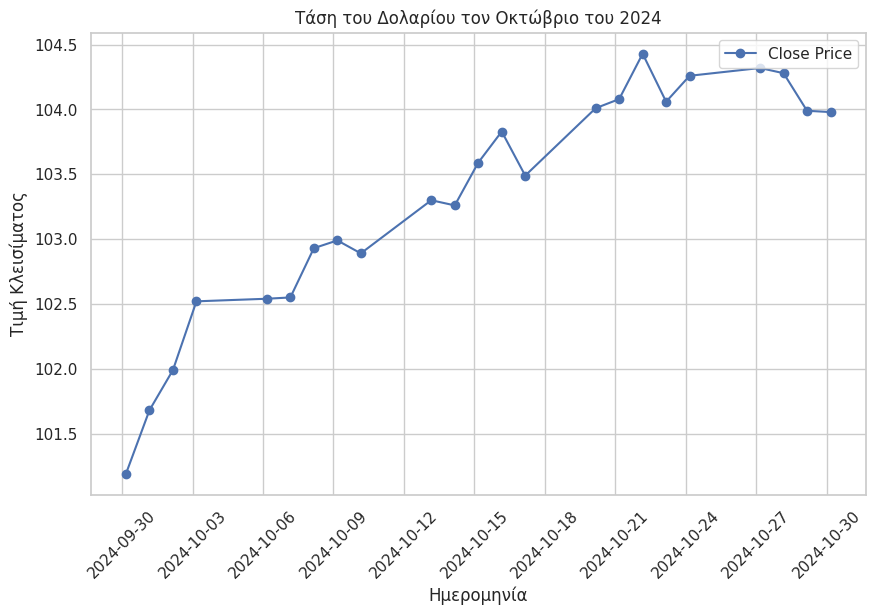

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Φιλτράρουμε τα δεδομένα για τον Οκτώβριο του 2024
october_2024_data = df[(df['Date'] >= '2024-10-01') & (df['Date'] <= '2024-10-31')]

# Γραφική απεικόνιση της τάσης της τιμής Close για τον Οκτώβριο του 2024
plt.figure(figsize=(10, 6))
plt.plot(october_2024_data['Date'], october_2024_data['Close'], marker='o', color='b', label='Close Price')

# Ρυθμίσεις για τον άξονα x
plt.title("Τάση του Δολαρίου τον Οκτώβριο του 2024")
plt.xlabel("Ημερομηνία")
plt.ylabel("Τιμή Κλεισίματος")
plt.legend()
plt.grid(True)

# Περιστροφή ετικετών και ρύθμιση απόστασης
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Εμφανίζει ετικέτες κάθε 3 ημέρες

plt.show()

Τον Οκτώβριο του 2024, παρατηρούμε μια ανοδική τάση στην τιμή του δολαρίου, με την τιμή να αυξάνεται από 101.19 στην αρχή του μήνα, φτάνοντας σε κορυφή 104.43 στις 23 Οκτωβρίου. Αυτή η τάση πιθανώς οφείλεται σε:

1.   Αυξήσεις επιτοκίων από τη Federal Reserve, που ενισχύουν το δολάριο λόγω υψηλότερων αποδόσεων.
2.   Διεθνή οικονομική αβεβαιότητα, που ωθεί τους επενδυτές να στραφούν σε ασφαλή καταφύγια όπως το δολάριο.
3. Εποχική ζήτηση, καθώς πλησιάζει το τέλος του οικονομικού έτους.



**Πρόβλεψη της τιμής "Close" για την επόμενη Μέρα**

Η πρόβλεψη της τιμής Close του δολαρίου για την επόμενη μέρα, χρησιμοποιώντας μόνο τις τιμές Open, High, Low, και Close της σημερινής ημέρας, είναι περιορισμένης ακρίβειας. Μια συνάρτηση με την παρακάτω μορφή

$$ f(o_t, h_t, l_t, c_t) = c_{t+1} $$

θα μπορούσε να προσδιορίσει συσχετίσεις, αλλά επειδή οι τιμές του δολαρίου επηρεάζονται από πολλούς εξωτερικούς παράγοντες και παλαιότερα δεδομένα, θα ήταν προτιμότερο να χρησιμοποιηθούν δεδομένα πολλών ημερών (timeframes) για μεγαλύτερη ακρίβεια στην πρόβλεψη.

**Διαχωρισμός δεδομένων σε Train και Test Sets**

Ο τυχαίος διαχωρισμός των δεδομένων σε train και test δεν έχει νόημα σε αυτή την περίπτωση για τους εξής λόγους:



1.   Στις χρονοσειρές, η χρονική ακολουθία των δεδομένων είναι πολύ σημαντική. Η μελλοντική τιμή εξαρτάται από τις προηγούμενες τιμές, και η πρόβλεψη γίνεται με βάση την εξέλιξη της τιμής με την πάροδο του χρόνου.
2.   Αν γίνει τυχαίος διαχωρισμός, το μοντέλο θα εκπαιδευτεί με δεδομένα από μελλοντικές τιμές και θα προσπαθήσει να προβλέψει προηγούμενες τιμές, κάτι που δεν αντιστοιχεί στην πραγματική διαδικασία πρόβλεψης.
3. Για να προβλέψουμε τις τιμές σε χρονολογική σειρά, είναι σημαντικό το μοντέλο να έχει εκπαιδευτεί σε ιστορικά δεδομένα και να δοκιμαστεί σε πιο πρόσφατα δεδομένα. Αυτός ο τρόπος προσομοιώνει την πραγματική χρήση του μοντέλου όπου θα προβλέπουμε τιμές με βάση την εξέλιξη που έχει παρατηρηθεί μέχρι στιγμής.



**Σωστός διαχωρισμός δεδομένων**



1.   Τα δεδομένα train περιλαμβάνουν όλες τις εγγραφές μέχρι το τέλος του 2023.
2.   Τα δεδομένα test περιλαμβάνουν τις εγγραφές του 2024.

Αυτός ο χρονικός διαχωρισμός εξασφαλίζει ότι το μοντέλο εκπαιδεύεται μόνο με παλαιότερα δεδομένα και αξιολογείται σε δεδομένα που αντιστοιχούν σε μελλοντική περίοδο.

In [ ]:
train = df[df['Date'] < '2024-01-01']
test = df[df['Date'] >= '2024-01-01']

# Αφαίρεση της στήλης Date
train = train.drop(columns=['Date'])
test = test.drop(columns=['Date'])

**Δημιουργία Timeframes και Targets**

In [ ]:
import numpy as np

def create_timeframes(dataframe, timeframe=5):
    x, y = [], []
    for i in range(len(dataframe) - timeframe):
        x.append(dataframe.iloc[i:i+timeframe][['Open', 'High', 'Low', 'Close']].values)
        y.append(dataframe.iloc[i+timeframe]['Close'])
    return np.array(x), np.array(y)

**Μέγεθος του timeframe N**

Για την πρόβλεψη της τιμής close της επόμενης ημέρας, το μέγεθος του timeframe \( N \) πρέπει να είναι σχετικά μικρό, καθώς οι πιο πρόσφατες τιμές συχνά περιέχουν τις πιο σχετικές πληροφορίες για την αμέσως επόμενη ημέρα. Ένα μικρό \( N \), όπως 3 έως 5 ημέρες, είναι συνήθως επαρκές για την πρόβλεψη βραχυπρόθεσμων τιμών, διότι αποφεύγεται η εισαγωγή "θορύβου" από παλαιότερες, λιγότερο σχετικές τιμές. Αντίθετα, όταν θέλουμε να προβλέψουμε σε μακρινό χρονικό ορίζοντα, όπως έναν μήνα, απαιτείται μεγαλύτερο \( N \) (π.χ., 20-30 ημέρες) ώστε το μοντέλο να «δει» ένα ευρύτερο ιστορικό δεδομένων και να αποτυπώσει καλύτερα τις τάσεις και τα μακροπρόθεσμα μοτίβα.

**Δημιουργία των x_train και y_train για τα δεδομένα εκπαίδευσης**

In [ ]:
x_train, y_train = create_timeframes(train, timeframe=5)
x_test, y_test = create_timeframes(test, timeframe=5)

**Μετατροπή των inputs σε διανύσματα**

In [ ]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Έλεγχος ότι το πλήθος των input είναι το ίδιο με το πλήθος των target
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Εκτύπωση του πρώτου input του x_train
print("First input of x_train:", x_train[0])

x_train shape: (1041, 20)
y_train shape: (1041,)
First input of x_train: [97.22000122 97.58000183 97.16999817 97.51000214 97.55000305 98.01000214
 97.47000122 97.98000336 97.94000244 97.98000336 97.77999878 97.94999695
 97.94999695 98.23000336 97.81999969 98.13999939 98.13999939 98.40000153
 98.09999847 98.34999847]


# Εκπαίδευση και αξιολόγηση μοντέλων

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt
import numpy as np

**Linear Regression**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_train_linear = linear_model.predict(x_train)
y_pred_test_linear = linear_model.predict(x_test)

mae_train_linear = mean_absolute_error(y_train, y_pred_train_linear)
mae_test_linear = mean_absolute_error(y_test, y_pred_test_linear)
print(f"Linear Regression - MAE Train: {mae_train_linear}, MAE Test: {mae_test_linear}")

Linear Regression - MAE Train: 0.33893696908430476, MAE Test: 0.2649986112981474


**Voting Regressor με Random Forest**

In [ ]:
random_forest = RandomForestRegressor()
voting_model = VotingRegressor([('rf', random_forest), ('lr', linear_model)])
voting_model.fit(x_train, y_train)
y_pred_train_voting = voting_model.predict(x_train)
y_pred_test_voting = voting_model.predict(x_test)

mae_train_voting = mean_absolute_error(y_train, y_pred_train_voting)
mae_test_voting = mean_absolute_error(y_test, y_pred_test_voting)
print(f"Voting Regressor - MAE Train: {mae_train_voting}, MAE Test: {mae_test_voting}")

Voting Regressor - MAE Train: 0.23504676195531862, MAE Test: 0.2733890939883591


**XGBoost Regressor (Boosting)**

In [ ]:
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train, y_train)
y_pred_train_xgb = xgboost_model.predict(x_train)
y_pred_test_xgb = xgboost_model.predict(x_test)

mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
print(f"XGBoost Regressor - MAE Train: {mae_train_xgb}, MAE Test: {mae_test_xgb}")

XGBoost Regressor - MAE Train: 0.04024537862435083, MAE Test: 0.36489134710192106


**Bagging Regressor με Linear Regression**

In [ ]:
bagging_model = BaggingRegressor(estimator=linear_model, n_estimators=10)
bagging_model.fit(x_train, y_train)
y_pred_train_bagging = bagging_model.predict(x_train)
y_pred_test_bagging = bagging_model.predict(x_test)

mae_train_bagging = mean_absolute_error(y_train, y_pred_train_bagging)
mae_test_bagging = mean_absolute_error(y_test, y_pred_test_bagging)
print(f"Bagging Regressor - MAE Train: {mae_train_bagging}, MAE Test: {mae_test_bagging}")

Bagging Regressor - MAE Train: 0.3382943282350595, MAE Test: 0.26307162174067206


**Stacking Regressor με Linear Regression**

In [ ]:
stacking_model = StackingRegressor(
    estimators=[('rf', random_forest), ('xgb', xgboost_model)],
    final_estimator=linear_model
)
stacking_model.fit(x_train, y_train)
y_pred_train_stacking = stacking_model.predict(x_train)
y_pred_test_stacking = stacking_model.predict(x_test)

mae_train_stacking = mean_absolute_error(y_train, y_pred_train_stacking)
mae_test_stacking = mean_absolute_error(y_test, y_pred_test_stacking)
print(f"Stacking Regressor - MAE Train: {mae_train_stacking}, MAE Test: {mae_test_stacking}")

Stacking Regressor - MAE Train: 0.5867675777062005, MAE Test: 0.6235699246418294


**Συγκέντρωση των αποτελεσμάτων**

In [ ]:
models = ['Linear', 'Voting', 'XGBoost', 'Bagging', 'Stacking']
mae_train = [mae_train_linear, mae_train_voting, mae_train_xgb, mae_train_bagging, mae_train_stacking]
mae_test = [mae_test_linear, mae_test_voting, mae_test_xgb, mae_test_bagging, mae_test_stacking]

**Δημιουργία bar plot**

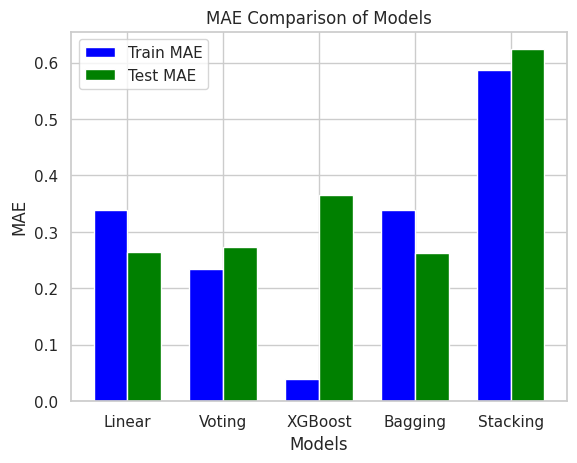

In [ ]:
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, mae_train, width, label='Train MAE', color='blue')
ax.bar(x + width/2, mae_test, width, label='Test MAE', color='green')

ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_title('MAE Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

**Συνοπτική εξήγηση των μοντέλων**

1.   **Linear Regression:** Χρησιμοποιεί μια γραμμική προσέγγιση για την πρόβλεψη της τιμής του στόχου.
2.   **Voting Regressor:** Συνδυάζει τις προβλέψεις πολλών μοντέλων και επιστρέφει το μέσο όρο τους.
3. **XGBoost Regressor:** Ενισχυτική μέθοδος βασισμένη σε δέντρα απόφασης που βελτιώνει σταδιακά την απόδοση.
4. **Bagging Regressor:** Δημιουργεί διαφορετικά δείγματα και εκπαιδεύει ένα Linear Regression στο καθένα, επιστρέφοντας τον μέσο όρο των προβλέψεων.
5. **Stacking Regressor:** Συνδυάζει προβλέψεις από διαφορετικά μοντέλα και χρησιμοποιεί ένα τελικό μοντέλο για τη βελτίωση της ακρίβειας.



# Προσθήκη του μήνα ως χαρακτηριστικό

In [ ]:
# Προσθήκη του μήνα ως κανονικοποιημένο χαρακτηριστικό
df['Month'] = df['Date'].dt.month - 1  # Από 0 (Ιανουάριος) έως 11 (Δεκέμβριος)
df['Month'] = df['Month'] / 11  # Κανονικοποίηση

Η προσθήκη του μήνα ενσωματώνει την εποχικότητα στη χρονοσειρά. Για παράδειγμα, αν το δολάριο έχει τάσεις να ενισχύεται ή να αποδυναμώνεται σε συγκεκριμένους μήνες λόγω εποχικών παραγόντων, η πληροφορία αυτή βοηθά τα μοντέλα να εντοπίσουν εποχικά μοτίβα και να προσαρμόζουν τις προβλέψεις τους ανάλογα.

# Υπολογισμός λογαριθμικών επιστροφών (Log Returns)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ρυθμίζουμε το στυλ για τα διαγράμματα
sns.set(style="whitegrid")

# Υπολογισμός λογαριθμικών επιστροφών για κάθε στήλη
for col in ['Open', 'High', 'Low', 'Close']:
    df[f'Log_Returns_{col}'] = np.log(df[col] / df[col].shift(1))

**Δημιουργία ιστογράμματος για κάθε στήλη**

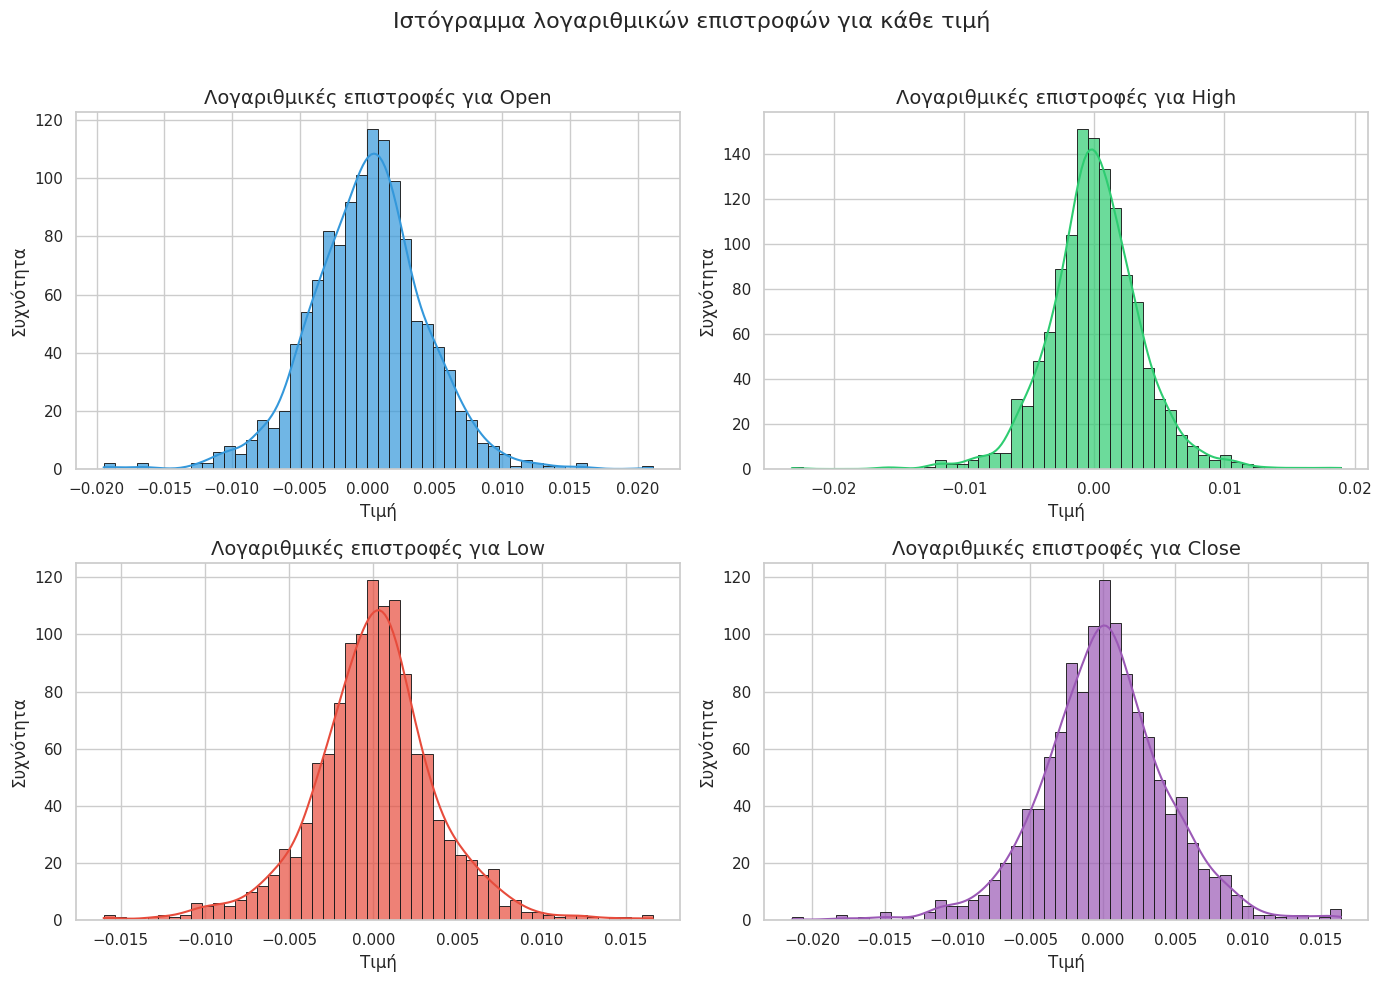

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Ιστόγραμμα λογαριθμικών επιστροφών για κάθε τιμή', fontsize=16)

columns = ['Log_Returns_Open', 'Log_Returns_High', 'Log_Returns_Low', 'Log_Returns_Close']
titles = ['Open', 'High', 'Low', 'Close']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']  # Χρώματα για κάθε διάγραμμα

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[columns[i]].dropna(), bins=50, kde=True, color=colors[i], ax=ax, edgecolor="k", alpha=0.7)
    ax.set_title(f'Λογαριθμικές επιστροφές για {titles[i]}', fontsize=14)
    ax.set_xlabel('Τιμή')
    ax.set_ylabel('Συχνότητα')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Προσαρμογή για να χωρέσει ο τίτλος
plt.show()

Η χρήση λογαριθμικών επιστροφών βελτιώνει τις προβλέψεις των μοντέλων, καθώς σταθεροποιεί τις διακυμάνσεις, κανονικοποιεί τις σχετικές μεταβολές και μειώνει την επίδραση ακραίων τιμών. Αυτό επιτρέπει στα μοντέλα να επικεντρωθούν καλύτερα σε μοτίβα και τάσεις, ενισχύοντας την ακρίβεια των προβλέψεων.

# Ανάλυση πρόβλεψης

Η τιμή
$$  C_{t+1} = 0.01 $$

αντιπροσωπεύει την αναμενόμενη λογαριθμική απόδοση μεταξύ των τιμών Close στις χρονικές στιγμές \( t \) και \( t+1 \).

Για να βρούμε την απόλυτη τιμή του

$$ C_{t+1}  $$

μπορούμε να χρησιμοποιήσουμε τον αντίστροφο τύπο:

$$
[
C_{t+1} = C_t \times e^{C_{t+1}}
]
$$




In [ ]:
C_t = 0.95
log_return_prediction = 0.01
C_t_plus_1 = C_t * np.exp(log_return_prediction)
print("Η προβλεπόμενη απόλυτη τιμή C_(t+1):", C_t_plus_1)

Η προβλεπόμενη απόλυτη τιμή C_(t+1): 0.9595476587299595


# Προετοιμασία των χαρακτηριστικών (ερωτήματα 7 και 9)

**Προσθήκη νέου χαρακτηριστικού για τον μήνα**

In [ ]:
# Προσθήκη στήλης 'Month' στο αρχικό DataFrame
df['Month'] = df['Date'].dt.month - 1  # Από 0 (Ιανουάριος) έως 11 (Δεκέμβριος)
df['Month'] = df['Month'] / 11  # Κανονικοποίηση

# Διαγραφή των γραμμών με NaN από το αρχικό DataFrame
df.dropna(inplace=True)

# Διαχωρισμός σε train και test ΧΩΡΙΣ να αφαιρέσουμε τη στήλη 'Date'
train = df[df['Date'] < '2024-01-01'].reset_index(drop=True)
test = df[df['Date'] >= '2024-01-01'].reset_index(drop=True)

**Υπολογισμός λογαριθμικών επιστροφών**

In [ ]:
for col in ['Open', 'High', 'Low', 'Close']:
    # Προσθήκη ενός μικρού offset 1e-9 για να αποφύγουμε τα NaN λόγω μικρών τιμών ή έλλειψης προηγούμενης τιμής.

    train[f'Log_Returns_{col}'] = np.log(train[col] / (train[col].shift(1) + 1e-9))
    test[f'Log_Returns_{col}'] = np.log(test[col] / (test[col].shift(1) + 1e-9))

# Αντικατάσταση τιμών NaN με 0
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

**Δημιουργία timeframes με βάση τα νέα χαρακτηριστικά**

In [ ]:
def create_timeframes(dataframe, timeframe=5):
    x, y, y_dates, C_t = [], [], [], []
    features = ['Open', 'High', 'Low', 'Close', 'Month'] + [f'Log_Returns_{col}' for col in ['Open', 'High', 'Low', 'Close']]
    for i in range(len(dataframe) - timeframe):
        x.append(dataframe.iloc[i:i+timeframe][features].values)
        y.append(dataframe.iloc[i+timeframe]['Close'])
        y_dates.append(dataframe.iloc[i+timeframe]['Date'])
        C_t.append(dataframe.iloc[i+timeframe - 1]['Close'])  # Τιμή κλεισίματος στο χρόνο t
    return np.array(x), np.array(y), y_dates, np.array(C_t)

**Δημιουργία x_train, y_train, x_test, y_test**

In [ ]:
x_train, y_train, y_train_dates, C_t_train = create_timeframes(train, timeframe=5)
x_test, y_test, y_test_dates, C_t_test = create_timeframes(test, timeframe=5)

**Ανασχηματισμός των δεδομένων σε διανύσματα Nx4**

In [ ]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Εκπαίδευση μοντέλων με τα νέα χαρακτηριστικά

**Linear Regression**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

mae_train_linear = mean_absolute_error(y_train, linear_model.predict(x_train))
mae_test_linear = mean_absolute_error(y_test, linear_model.predict(x_test))
print(f"Linear Regression - MAE Train: {mae_train_linear}, MAE Test: {mae_test_linear}")

Linear Regression - MAE Train: 0.33463476695162125, MAE Test: 0.273025843059264


**Voting Regressor με Random Forest**

In [ ]:
random_forest = RandomForestRegressor()
voting_model = VotingRegressor([('rf', random_forest), ('lr', linear_model)])
voting_model.fit(x_train, y_train)

mae_train_voting = mean_absolute_error(y_train, voting_model.predict(x_train))
mae_test_voting = mean_absolute_error(y_test, voting_model.predict(x_test))
print(f"Voting Regressor - MAE Train: {mae_train_voting}, MAE Test: {mae_test_voting}")

Voting Regressor - MAE Train: 0.2318459264999491, MAE Test: 0.2669692660610638


**XGBoost Regressor (Boosting)**

In [ ]:
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train, y_train)

mae_train_xgb = mean_absolute_error(y_train, xgboost_model.predict(x_train))
mae_test_xgb = mean_absolute_error(y_test, xgboost_model.predict(x_test))
print(f"XGBoost Regressor - MAE Train: {mae_train_xgb}, MAE Test: {mae_test_xgb}")

XGBoost Regressor - MAE Train: 0.0033499937791090745, MAE Test: 0.34966399704200635


**Bagging Regressor με Linear Regression**

In [ ]:
bagging_model = BaggingRegressor(estimator=linear_model, n_estimators=10)
bagging_model.fit(x_train, y_train)

mae_train_bagging = mean_absolute_error(y_train, bagging_model.predict(x_train))
mae_test_bagging = mean_absolute_error(y_test, bagging_model.predict(x_test))
print(f"Bagging Regressor - MAE Train: {mae_train_bagging}, MAE Test: {mae_test_bagging}")

Bagging Regressor - MAE Train: 0.3363697529116268, MAE Test: 0.27536617366103655


**Stacking Regressor με Linear Regression**

In [ ]:
stacking_model = StackingRegressor(estimators=[('rf', random_forest), ('xgb', xgboost_model)], final_estimator=linear_model)
stacking_model.fit(x_train, y_train)

mae_train_stacking = mean_absolute_error(y_train, stacking_model.predict(x_train))
mae_test_stacking = mean_absolute_error(y_test, stacking_model.predict(x_test))
print(f"Stacking Regressor - MAE Train: {mae_train_stacking}, MAE Test: {mae_test_stacking}")

Stacking Regressor - MAE Train: 0.6234054388022094, MAE Test: 0.7024634492341142


**Σύγκριση MAE των μοντέλων σε bar plot**

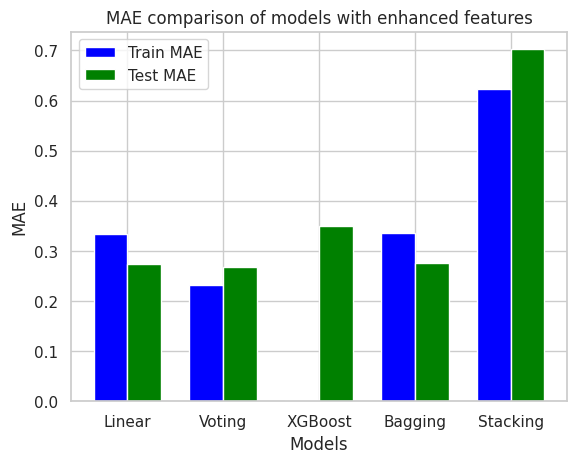

In [ ]:
models = ['Linear', 'Voting', 'XGBoost', 'Bagging', 'Stacking']
mae_train = [mae_train_linear, mae_train_voting, mae_train_xgb, mae_train_bagging, mae_train_stacking]
mae_test = [mae_test_linear, mae_test_voting, mae_test_xgb, mae_test_bagging, mae_test_stacking]
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, mae_train, width, label='Train MAE', color='blue')
ax.bar(x + width/2, mae_test, width, label='Test MAE', color='green')
ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_title('MAE comparison of models with enhanced features')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

# Εκπαίδευση Lasso Regressor

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.preprocessing import StandardScaler

**Κανονικοποίηση των χαρακτηριστικών**

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.001, max_iter=10000)

**Εύρεση των 10 σημαντικότερων χαρακτηριστικών**

In [ ]:
lasso_coefs = lasso.coef_
top_features_idx = np.argsort(np.abs(lasso_coefs))[-10:]

**Δημιουργία ονομάτων για τα χαρακτηριστικά (για 5 ημέρες, 4 χαρακτηριστικά ανά ημέρα και επιπλέον Month και Log_Returns)**

In [ ]:
feature_names = []
num_days = 5  # Αριθμός ημερών στο timeframe
base_features = ['Open', 'High', 'Low', 'Close', 'Month', 'Log_Returns_Open', 'Log_Returns_High', 'Log_Returns_Low', 'Log_Returns_Close']

for day in range(1, num_days + 1):
    for feature in base_features:
        feature_names.append(f"Day {day} - {feature}")

In [ ]:
if len(feature_names) != len(lasso_coefs):
    print(f"Warning: Mismatch between feature names ({len(feature_names)}) and model coefficients ({len(lasso_coefs)})")
else:
    top_features = [(feature_names[i], lasso_coefs[i]) for i in top_features_idx]
    print("Top 10 features and their coefficients (absolute values):")
    for feature, coef in top_features:
        print(f"{feature}: {abs(coef):.4f}")


Top 10 features and their coefficients (absolute values):
Day 3 - Low: 0.0918
Day 4 - High: 0.1389
Day 3 - High: 0.2228
Day 5 - Log_Returns_Close: 0.2823
Day 2 - Close: 0.5238
Day 5 - High: 0.5400
Day 4 - Close: 0.6202
Day 2 - Low: 0.7264
Day 3 - Close: 1.1358
Day 5 - Close: 1.8302


Η ανάλυση των συντελεστών του Lasso Regressor δείχνει ότι η τιμή κλεισίματος της πιο πρόσφατης ημέρας (Day 5 - Close) είναι ο πιο καθοριστικός παράγοντας για την πρόβλεψη της τιμής κλεισίματος της επόμενης ημέρας.

# Line plot με τις προβλέψεις και τις πραγματικές τιμές για το Lasso

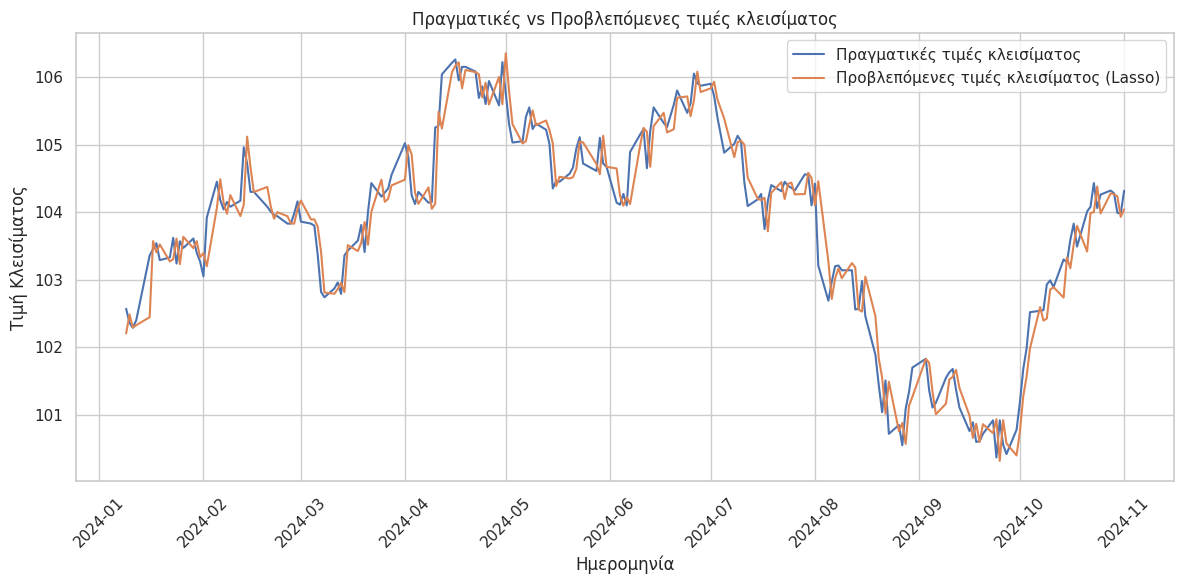

MAE μεταξύ των πραγματικών και προβλεπόμενων τιμών κλεισίματος: 0.2728481580812135


In [ ]:
# Πρόβλεψη στο test set
y_pred = lasso.predict(x_test_scaled)

# Οι τιμές C_t_plus_1_pred και C_t_plus_1_actual είναι απλώς οι προβλέψεις και οι πραγματικές τιμές
C_t_plus_1_pred = y_pred
C_t_plus_1_actual = y_test

# Γραφική απεικόνιση με χρήση της στήλης 'Date'
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_dates, C_t_plus_1_actual, label='Πραγματικές τιμές κλεισίματος')
plt.plot(y_test_dates, C_t_plus_1_pred, label='Προβλεπόμενες τιμές κλεισίματος (Lasso)')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή Κλεισίματος')
plt.title('Πραγματικές vs Προβλεπόμενες τιμές κλεισίματος')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Υπολογισμός του MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(C_t_plus_1_actual, C_t_plus_1_pred)
print(f"MAE μεταξύ των πραγματικών και προβλεπόμενων τιμών κλεισίματος: {mae}")
